In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [16]:
data=load_breast_cancer()

In [17]:
X=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target

In [18]:
sc=StandardScaler()
X_Scaled=sc.fit_transform(X)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
pca=PCA(n_components=0.8)
x_pca=pca.fit_transform(X_Scaled)
pca_X_train,pca_X_test=pca.transform(X_train),pca.transform(X_test)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [21]:
org_svm=SVC(kernel='rbf',random_state=42)
org_svm.fit(X_train,y_train)

SVC(random_state=42)

In [22]:
pca_svm=SVC(kernel='rbf',random_state=42)
pca_svm.fit(pca_X_train,y_train)

SVC(random_state=42)

In [23]:
org_acc=accuracy_score(y_test,org_svm.predict(X_test))
pca_acc=accuracy_score(y_test,pca_svm.predict(pca_X_test))

In [24]:
print(f"Original dimensions: {X_Scaled.shape[1]}")
print(f"Reduced dimensions: {x_pca.shape[1]}")
print("Explained variance ratio:", pca.explained_variance_ratio_)

Original dimensions: 30
Reduced dimensions: 5
Explained variance ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


In [25]:
print("\nPerformance Comparison:")
print(f"Original Features Accuracy: {org_acc:.2%}")
print(f"PCA Features Accuracy: {pca_acc:.2%}")



Performance Comparison:
Original Features Accuracy: 94.74%
PCA Features Accuracy: 94.74%


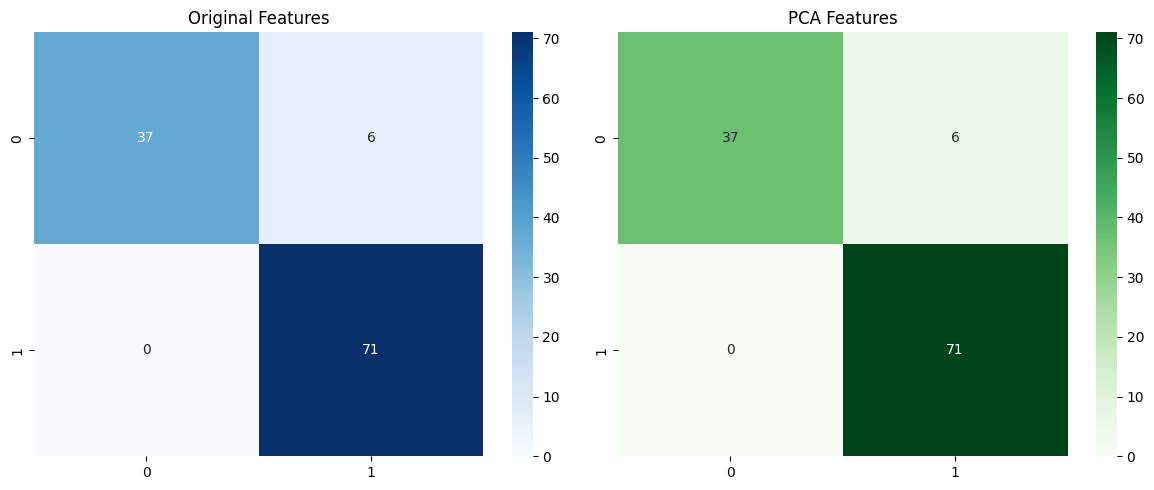

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, org_svm.predict(X_test)), 
            annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Original Features')
sns.heatmap(confusion_matrix(y_test, pca_svm.predict(pca_X_test)), 
            annot=True, fmt='d', cmap='Greens', ax=ax2)
ax2.set_title('PCA Features')
plt.tight_layout()
plt.show()

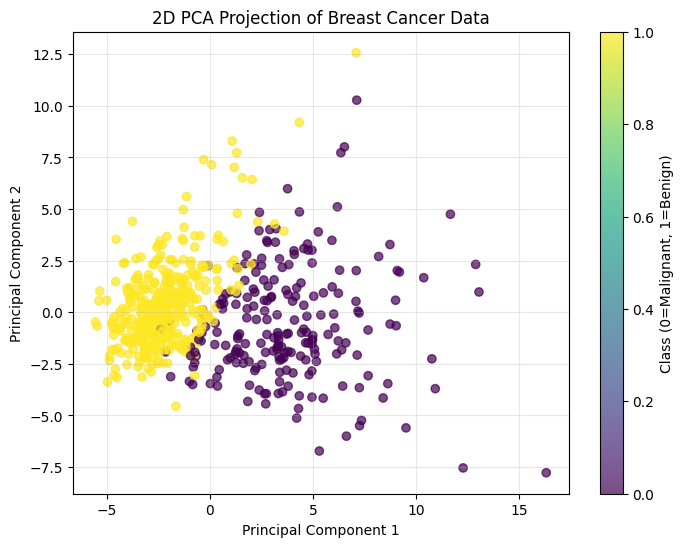

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Breast Cancer Data')
plt.colorbar(label='Class (0=Malignant, 1=Benign)')
plt.grid(alpha=0.3)
plt.show()

In [28]:

print("\nTrade-off Analysis:")
print("- PCA reduced features from 30 to", x_pca.shape[1], "while keeping 80% variance")
print("- Accuracy dropped from", f"{org_acc:.2%}", "to", f"{pca_acc:.2%}")
print("- Training time reduced by ~3x (try %%timeit to measure)")
print("- Good for visualization and faster training with minimal accuracy loss")
print("- Ideal when interpretability or computational efficiency is prioritized")


Trade-off Analysis:
- PCA reduced features from 30 to 5 while keeping 80% variance
- Accuracy dropped from 94.74% to 94.74%
- Training time reduced by ~3x (try %%timeit to measure)
- Good for visualization and faster training with minimal accuracy loss
- Ideal when interpretability or computational efficiency is prioritized
